In [ ]:
# Second example - slightly more complicated this time

In [1]:
# We will use pandas, a data analysis and manipulation tool, built on top of Python
# https://pandas.pydata.org/
import pandas 

print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('floats.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [2]:
# Ok, what do the rows of data look like?

print('Sample rows from the dataset (top five):')  
print(dataset.head(5))  # first 5 rows

print('Sample rows from the dataset (bottom five):')  
print(dataset.tail(5))  # last five rows

Sample rows from the dataset (top five):
   callSign Date_Time    JulianDay  Time_QC  Latitude  Longitude  Position_QC  \
0  Q4901043   7/12/10  2455390.351        1    24.823    -87.964            1   
1  Q4901043   7/12/10  2455390.351        1    24.823    -87.964            1   
2  Q4901043   7/12/10  2455390.351        1    24.823    -87.964            1   
3  Q4901043   7/12/10  2455390.351        1    24.823    -87.964            1   
4  Q4901043   7/12/10  2455390.351        1    24.823    -87.964            1   

   Depth  Depth_QC  Temperature  Temperature_QC  Salinity  Salinity_QC  
0    2.0         1        29.83               1     36.59            1  
1    4.0         1        29.65               1     36.58            1  
2    6.0         1        29.53               1     36.58            1  
3    8.0         1        29.49               1     36.58            1  
4   10.0         1        29.46               1     36.58            1  
Sample rows from the dataset (bott

In [3]:
# Let's now look at a numerical summary table

print('Summary of the dataset - Univariate statistics')   
print(dataset.describe(include='all'))

Summary of the dataset - Univariate statistics
        callSign Date_Time     JulianDay  Time_QC      Latitude     Longitude  \
count      10021     10021  1.002100e+04  10021.0  10021.000000  10021.000000   
unique        11        73           NaN      NaN           NaN           NaN   
top     Q4901044    8/6/10           NaN      NaN           NaN           NaN   
freq        2877       635           NaN      NaN           NaN           NaN   
mean         NaN       NaN  2.455390e+06      1.0     26.993169    -86.772731   
std          NaN       NaN  2.322667e+01      0.0      1.178793      1.274220   
min          NaN       NaN  2.455341e+06      1.0     23.787000    -89.813000   
25%          NaN       NaN  2.455373e+06      1.0     26.019000    -87.689000   
50%          NaN       NaN  2.455391e+06      1.0     27.397000    -86.725000   
75%          NaN       NaN  2.455410e+06      1.0     27.698000    -85.972000   
max          NaN       NaN  2.455426e+06      1.0     28.94700

In [4]:
# Not all the columns are variables, so they can't be used as features
# Let's set up a prediction problem: 
# Can we predict the value of 'callSign' using these three features:  'Depth', 'Temperature', 'Salinity' ?

print('Reading list of problem variables X and Y...')
X_name = [ 'Depth', 'Temperature', 'Salinity' ] # names of columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'callSign'   # name of column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



In [5]:
# Spot checks for X:

print('Sample rows from X (top and bottom):')
print(X.head(3))
print(X.tail(3))
print('\n')

print('Statistical summary of X:')
print(X.describe())
print('\n')

Sample rows from X (top and bottom):
   Depth  Temperature  Salinity
0    2.0        29.83     36.59
1    4.0        29.65     36.58
2    6.0        29.53     36.58
       Depth  Temperature  Salinity
10329  594.0         7.36     34.92
10330  668.0         6.73     34.90
10331  742.0         6.60     34.90


Statistical summary of X:
              Depth   Temperature      Salinity
count  10021.000000  10021.000000  10021.000000
mean     300.905399     16.273756     35.822074
std      268.015655      7.876257      0.690964
min        2.000000      4.670000     28.750000
25%       77.000000      8.690000     35.030000
50%      214.000000     16.170000     36.070000
75%      492.000000     23.040000     36.460000
max      996.000000     31.710000     36.900000




Summary of X - Univariate graphs


<Figure size 640x480 with 0 Axes>

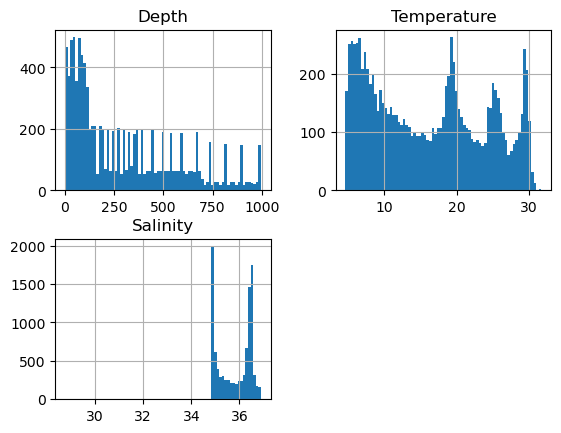

<Figure size 640x480 with 0 Axes>

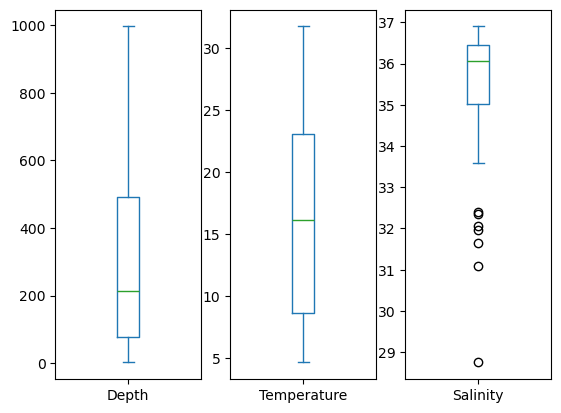

In [6]:
# Let's now look at some graphical summaries

import matplotlib.pyplot as plt  # https://matplotlib.org/

print('Summary of X - Univariate graphs')

plt.figure()  
X.hist(bins=75)  # histogram with number of bins ~= sqrt(N)
plt.show()

plt.figure()
X.plot(kind='box', subplots=True, sharex=False, sharey=False)  # boxplots
plt.show()

Summary of X - Bivariate (column-pair) graphs:


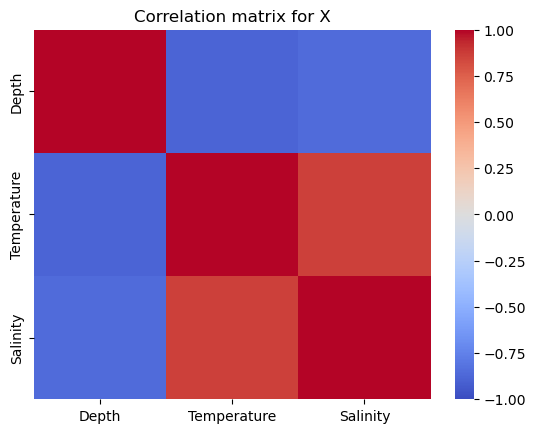

<Figure size 640x480 with 0 Axes>

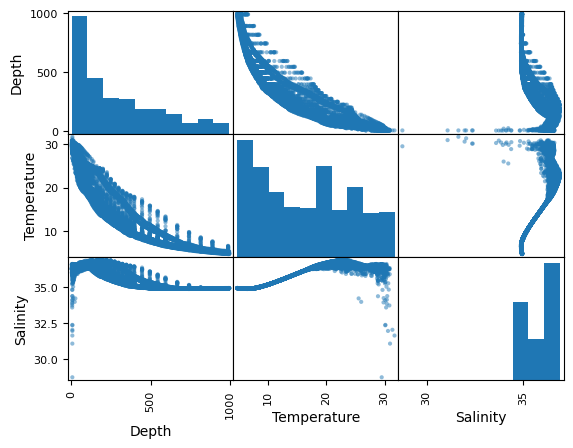

In [7]:
# More graphical summaries
print('Summary of X - Bivariate (column-pair) graphs:')

import seaborn as sns   
# seaborn is a Python data visualization library based on matplotlib
# https://seaborn.pydata.org/


plt.figure()
corr = X.corr()    # compute the correlation between the variables
sns.heatmap( corr, cmap='coolwarm', vmax=1.0, vmin=-1.0 );   # plot it as a heat map
plt.title('Correlation matrix for X')
plt.show()

from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(X)
plt.show()

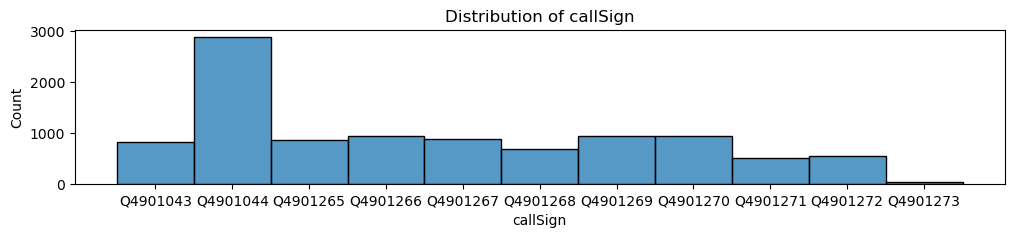

In [8]:
# Plotting the distribution of y
plt.figure(figsize=(12, 2))   # we can control the size of the figure
sns.histplot(data=y)
plt.title('Distribution of callSign')
plt.show()

In [9]:
# Time for ML

# select a model template from the library
from sklearn.linear_model import LogisticRegression   #  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model_name = LogisticRegression()   

print('please wait - training model on data...')
model_name.fit(X, y)  # train the model on the data
print('done with training the model')


please wait - training model on data...
done with training the model


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
# How does the model do with predictions? 

# Spot checks

X_spot_check = X.loc[402:405,] # select rows labeled 402 - 405
y_spot_check = y.loc[402:405]  # select rows labeled 402 - 405

print('spot check predictions')

print('features:')
print(X_spot_check)

predicted_label = model_name.predict(X_spot_check)  # make predictions

print('predicted label(s):')
print(predicted_label)
print('true label(s):')
print(y_spot_check)



NameError: name 'X' is not defined